## Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
import soccerdata as sd
import re
from unidecode import unidecode

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'w'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [78]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


## Extracting Data

### WhoScored

In [1]:
def extract_json_from_html(html_path, save_output=False):
    with open(html_path, 'r', encoding='utf-8') as html_file:
        html = html_file.read()

    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for JSON parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save JSON data to txt
        output_file = open(f"{html_path}.txt", "wt", encoding='utf-8')
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [36]:
i=9

match_html_path = f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Sporting/{i}.html"

json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

df = pd.DataFrame(events_dict)
dfp = pd.DataFrame(players_df)


df.to_csv(f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Sporting/Data/{i}.csv")
dfp.to_csv(f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Sporting/Data/Player/{i}.csv")

In [47]:
import glob
import os

# Specify the directory containing the CSV files
folder_path = "C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Sporting/Data/"

# Use glob to get all the CSV file paths
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# List to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    dfi = pd.read_csv(file)  # Read the CSV file
    dataframes.append(dfi)   # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [44]:
# Specify the directory containing the CSV files
folder_path = "C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Sporting/Data/Player/"

# Use glob to get all the CSV file paths
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# List to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    dfi = pd.read_csv(file)  # Read the CSV file
    dataframes.append(dfi)   # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
dfp = pd.concat(dataframes, ignore_index=True)

In [39]:
df.columns

Index(['Unnamed: 0', 'id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'relatedEventId', 'relatedPlayerId', 'goalMouthZ', 'goalMouthY',
       'isShot', 'isGoal', 'blockedX', 'blockedY', 'cardType', 'isOwnGoal'],
      dtype='object')

In [40]:
dfp.columns

Index(['Unnamed: 0', 'playerId', 'shirtNo', 'name', 'position', 'height',
       'weight', 'age', 'isFirstEleven', 'isManOfTheMatch', 'field', 'stats',
       'subbedInPlayerId', 'subbedOutPeriod', 'subbedOutExpandedMinute',
       'subbedInPeriod', 'subbedInExpandedMinute', 'subbedOutPlayerId',
       'teamId'],
      dtype='object')

In [48]:
# Extract the 'displayName' value
df['type'] = df['type'].str.extract(r"'displayName': '([^']+)")
df['outcomeType'] = df['outcomeType'].str.extract(r"'displayName': '([^']+)")
df['period'] = df['period'].str.extract(r"'displayName': '([^']+)")

# temprary use of typeId of period column
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})

# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def insert_ball_carries(events_df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10):
    events_out = pd.DataFrame()
    # Carry conditions (convert from metres to opta)
    min_carry_length = 3.0
    max_carry_length = 60.0
    min_carry_duration = 1.0
    max_carry_duration = 10.0
    # match_events = events_df[events_df['match_id'] == match_id].reset_index()
    match_events = events_df.reset_index()
    match_carries = pd.DataFrame()

    for idx, match_event in match_events.iterrows():

        if idx < len(match_events) - 1:
            prev_evt_team = match_event['teamId']
            next_evt_idx = idx + 1
            init_next_evt = match_events.loc[next_evt_idx]
            take_ons = 0
            incorrect_next_evt = True

            while incorrect_next_evt:

                next_evt = match_events.loc[next_evt_idx]

                if next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Successful':
                    take_ons += 1
                    incorrect_next_evt = True

                elif ((next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['teamId'] != prev_evt_team and next_evt['type'] == 'Challenge' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['type'] == 'Foul')):
                    incorrect_next_evt = True

                else:
                    incorrect_next_evt = False

                next_evt_idx += 1

            # Apply some conditioning to determine whether carry criteria is satisfied
            same_team = prev_evt_team == next_evt['teamId']
            not_ball_touch = match_event['type'] != 'BallTouch'
            dx = 105*(match_event['endX'] - next_evt['x'])/100
            dy = 68*(match_event['endY'] - next_evt['y'])/100
            far_enough = dx ** 2 + dy ** 2 >= min_carry_length ** 2
            not_too_far = dx ** 2 + dy ** 2 <= max_carry_length ** 2
            dt = 60 * (next_evt['cumulative_mins'] - match_event['cumulative_mins'])
            min_time = dt >= min_carry_duration
            same_phase = dt < max_carry_duration
            same_period = match_event['period'] == next_evt['period']

            valid_carry = same_team & not_ball_touch & far_enough & not_too_far & min_time & same_phase &same_period

            if valid_carry:
                carry = pd.DataFrame()
                prev = match_event
                nex = next_evt

                carry.loc[0, 'eventId'] = prev['eventId'] + 0.5
                carry['minute'] = np.floor(((init_next_evt['minute'] * 60 + init_next_evt['second']) + (
                        prev['minute'] * 60 + prev['second'])) / (2 * 60))
                carry['second'] = (((init_next_evt['minute'] * 60 + init_next_evt['second']) +
                                    (prev['minute'] * 60 + prev['second'])) / 2) - (carry['minute'] * 60)
                carry['teamId'] = nex['teamId']
                carry['x'] = prev['endX']
                carry['y'] = prev['endY']
                carry['expandedMinute'] = np.floor(((init_next_evt['expandedMinute'] * 60 + init_next_evt['second']) +
                                                    (prev['expandedMinute'] * 60 + prev['second'])) / (2 * 60))
                carry['period'] = nex['period']
                carry['type'] = carry.apply(lambda x: {'value': 99, 'displayName': 'Carry'}, axis=1)
                carry['outcomeType'] = 'Successful'
                carry['qualifiers'] = carry.apply(lambda x: {'type': {'value': 999, 'displayName': 'takeOns'}, 'value': str(take_ons)}, axis=1)
                carry['satisfiedEventsTypes'] = carry.apply(lambda x: [], axis=1)
                carry['isTouch'] = True
                carry['playerId'] = nex['playerId']
                carry['endX'] = nex['x']
                carry['endY'] = nex['y']
                carry['blockedX'] = np.nan
                carry['blockedY'] = np.nan
                carry['goalMouthZ'] = np.nan
                carry['goalMouthY'] = np.nan
                carry['isShot'] = np.nan
                carry['relatedEventId'] = nex['eventId']
                carry['relatedPlayerId'] = np.nan
                carry['isGoal'] = np.nan
                carry['cardType'] = np.nan
                carry['isOwnGoal'] = np.nan
                carry['type'] = 'Carry'
                carry['cumulative_mins'] = (prev['cumulative_mins'] + init_next_evt['cumulative_mins']) / 2

                match_carries = pd.concat([match_carries, carry], ignore_index=True, sort=False)

    match_events_and_carries = pd.concat([match_carries, match_events], ignore_index=True, sort=False)
    match_events_and_carries = match_events_and_carries.sort_values(['period', 'cumulative_mins']).reset_index(drop=True)

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_and_carries])

    return events_out

df = insert_ball_carries(df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10)

df = df.reset_index(drop=True)
df['index'] = range(1, len(df) + 1)
df = df[['index'] + [col for col in df.columns if col != 'index']]

# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT['qualifiers'] = dfxT['qualifiers'].astype(str)
dfxT = dfxT[(~dfxT['qualifiers'].str.contains('Corner'))]
dfxT = dfxT[(dfxT['type'].isin(['Pass', 'Carry'])) & (dfxT['outcomeType']=='Successful')]


xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None) # use this if you don't have your own xT value Grid
# xT = pd.read_csv("/content/xT_Grid.csv", header=None)    # use this if you have your own xT value Grid, then place your file path here
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['endX'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['endY'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'outcomeType', 'qualifiers',  'type',
                   'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY',
                   'goalMouthZ', 'goalMouthY', 'isShot', 'cumulative_mins']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='index', how='left')

# New Column for Team Names and Oppositon TeamNames
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())
opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
df['oppositionTeamName'] = df['teamName'].map(opposition_dict)

# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

columns_to_drop = ['height', 'weight', 'age', 'isManOfTheMatch', 'field', 'stats',
                   'subbedInPlayerId', 'subbedOutPeriod',
                   'subbedOutExpandedMinute', 'subbedInPeriod', 'subbedInExpandedMinute', 'subbedOutPlayerId',
                   'teamId']
dfp.drop(columns=columns_to_drop, inplace=True)

# adding player name, shirt no. etc info
df = df.merge(dfp, on='playerId', how='left')

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'),
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'),
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['endY'] - df['y'], df['endX'] - df['x']))

# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['name'] = df['name'].astype(str)
df['name'] = df['name'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['name'].apply(get_short_name)

df['qualifiers'] = df['qualifiers'].astype(str)
columns_to_drop2 = ['id']
df.drop(columns=columns_to_drop2, inplace=True)

df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime',
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})

C:\Users\acer\AppData\Local\Temp\ipykernel_54620\1053737656.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
C:\Users\acer\AppData\Local\Temp\ipykernel_54620\1053737656.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_54620\1053737656.py:157: FutureWarning: Series.__getitem__ treating keys as pos

In [49]:
df.to_csv("C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/Liga-Portugal/Sporting/event1_9.csv")

In [76]:
df = pd.read_csv("C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/Liga-Portugal/Sporting/event1_9.csv")

C:\Users\acer\AppData\Local\Temp\ipykernel_54620\717010697.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/Liga-Portugal/Sporting/event1_9.csv")


## ShotMap

In [50]:
df.columns

Index(['index', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'relatedEventId', 'relatedPlayerId', 'isGoal_x', 'cardType_x',
       'isOwnGoal_x', 'cumulative_mins', 'Unnamed: 0_x', 'isGoal_y',
       'cardType_y', 'isOwnGoal_y', 'Unnamed: 0_y', 'x1_bin_xT', 'y1_bin_xT',
       'x2_bin_xT', 'y2_bin_xT', 'start_zone_value_xT', 'end_zone_value_xT',
       'xT', 'teamName', 'oppositionTeamName', 'Unnamed: 0', 'shirtNo', 'name',
       'position', 'isFirstEleven', 'prog_pass', 'prog_carry',
       'pass_or_carry_angle', 'shortName'],
      dtype='object')

In [51]:
df['type'].unique()

array(['Start', 'Pass', 'Carry', 'Aerial', 'BallTouch', 'Challenge',
       'TakeOn', 'BallRecovery', 'Clearance', 'Tackle', 'MissedShots',
       'BlockedPass', 'OffsidePass', 'OffsideProvoked', 'Interception',
       'Dispossessed', 'SavedShot', 'Save', 'CornerAwarded', 'Foul',
       'KeeperPickup', 'Punch', 'Goal', 'Error', 'Smother',
       'KeeperSweeper', 'Card', 'ShieldBallOpp', 'Claim', 'ChanceMissed',
       'ShotOnPost', 'PenaltyFaced', 'FormationChange', 'SubstitutionOff',
       'SubstitutionOn', 'End', 'OffsideGiven', 'GoodSkill',
       'FormationSet'], dtype=object)

In [68]:
mask_shots = (df['type'] == 'Goal') | (df['type'] == 'MissedShots') | (df['type'] == 'SavedShot') | (df['type'] == 'ShotOnPost')
df_shots = df[mask_shots]
df_shots.reset_index(drop=True, inplace=True)
df_shots = df_shots.drop_duplicates()

In [71]:
df_shots[['x','y','c']].head(15)

,x,y,c
0,2.13675,15.25920,23.623744
1,26.50200,20.43808,20.102106
2,7.98000,30.93456,12.964499
3,4.23150,23.62864,17.932525
4,3.45975,24.69216,17.209331
5,3.23925,25.06208,16.957786
9,3.23925,25.06208,16.957786
10,3.23925,25.06208,16.957786
13,8.20050,25.24704,16.832013
16,8.20050,25.24704,16.832013


In [70]:
# Transform the x, y, and c columns in a more efficient manner
df_shots["x"] = (100 - df_shots["x"]) * 105 / 100
df_shots["y"] = df_shots["y"] * 68 / 100
df_shots["c"] = abs(df_shots["y"] - 50) * 68 / 100

In [72]:
df_shots["Distance"] = np.sqrt(df_shots["x"]**2 + df_shots["x"]**2)
df_shots["Angle"] = np.where(np.arctan(7.32 * df_shots["x"] / (df_shots["x"]**2 + df_shots["c"]**2 - (7.32/2)**2)) > 0, np.arctan(7.32 * df_shots["x"] /(df_shots["x"]**2 + df_shots["c"]**2 - (7.32/2)**2)), np.arctan(7.32 * df_shots["x"] /(df_shots["x"]**2 + df_shots["c"]**2 - (7.32/2)**2)) + np.pi)

In [ ]:
def plot_shotmap(df,teamcolor):
    total_shots = df.shape[0]
    total_goals = df[df['type'] == 'Goal'].shape[0]
    #total_xG = df['expectedGoals'].sum()
    #xG_per_shot = total_xG / total_shots
    points_average_distance = df['x'].mean()
    actual_average_distance = 105 - (df['x'] * 1.2).mean()
    
    pitch = VerticalPitch(
    pitch_type='uefa', 
    half=True, 
    pitch_color=background, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(10, 12))
    fig.patch.set_facecolor(background)


    # Top row for the team names and score
    # [left, bottom, width, height]

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.5, 
        y=.85, 
        s=team, 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color=teamcolor, 
        ha='center'
    )
    ax1.text(
        x=0.5, 
        y=.7, 
        s=f'All shots in the Liga Portugal 2024-25', 
        fontsize=14,
        fontweight='bold',
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )
    ax1.text(
        x=0.25, 
        y=0.5, 
        s=f'Low Quality Chance', 
        fontsize=12, 
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )

    # add a scatter point between the two texts
    ax1.scatter(
        x=0.37, 
        y=0.53, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.42, 
        y=0.53, 
        s=200, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.48, 
        y=0.53, 
        s=300, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.54, 
        y=0.53, 
        s=400, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.6, 
        y=0.53, 
        s=500, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.75, 
        y=0.5, 
        s=f'High Quality Chance', 
        fontsize=12, 
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )


    ax1.text(
        x=0.45, 
        y=0.27, 
        s=f'Goal', 
        fontsize=10, 
        fontproperties=font_props, 
        color='white', 
        ha='right'
    )
    ax1.scatter(
        x=0.47, 
        y=0.3, 
        s=100, 
        color=teamcolor, 
        edgecolor='white', 
        linewidth=.8,
        alpha=.7
    )


    ax1.scatter(
        x=0.53, 
        y=0.3, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.55, 
        y=0.27, 
        s=f'No Goal', 
        fontsize=10, 
        fontproperties=font_props, 
        color='white', 
        ha='left'
    )

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)


    # create a scatter plot at y 100 - average_distance
    ax2.scatter(
        x=60, 
        y=points_average_distance, 
        s=100, 
        color='white',  
        linewidth=.8
    )
    # create a line from the bottom of the pitch to the scatter point
    ax2.plot(
        [60, 60], 
        [105, points_average_distance], 
        color='white', 
        linewidth=2
    )

    # Add a text label for the average distance
    ax2.text(
        x=60, 
        y=points_average_distance - 4, 
        s=f'Average Distance\n{actual_average_distance:.1f} yards', 
        fontsize=10, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='center'
    )


    for x in df.to_dict(orient='records'):
        pitch.scatter(
            x['x'], 
            x['y'], 
            s=400 * x['expectedGoals'], 
            color=teamcolor if x['eventType'] == 'Goal' else background, 
            ax=ax2,
            alpha=.7,
            linewidth=.8,
            edgecolor='white'
        )
        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, .2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.25, 
        y=.5, 
        s='Shots', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.25, 
        y=0, 
        s=f'{total_shots}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=.5, 
        s='Goals', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=0, 
        s=f'{total_goals}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=.5, 
        s='xG', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=0, 
        s=f'{total_xG:.2f}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=.5, 
        s='xG/Shot', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=0, 
        s=f'{xG_per_shot:.2f}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.set_axis_off()

    return fig

## Average Positions

In [99]:
def scrape_sofascore_average_positions(matchId):
    response1 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/average-positions')
    #response2 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/lineups')
    data1 = response1.json()
    #data2 = response2.json()
    return data1

#mi = 12514006
#data1,data2 = scrape_sofascore_average_positions(mi)

In [100]:
match_ids = [12512901,12513987,12513997,12514006,12514014,12514029,12514034,12514044,12514056,12514067]
avg_pos = []
for mi in match_ids:
    data1 = scrape_sofascore_average_positions(mi)
    avg_pos.append(data1)

In [106]:
home_positions = []
away_positions = []

for match_data in avg_pos:
    if match_data:  # Check if match_data is not None
        home_positions.append(pd.json_normalize(match_data['home']))
        away_positions.append(pd.json_normalize(match_data['away']))

# Concatenate all home and away data into separate DataFrames
df_home_pos = pd.concat(home_positions, ignore_index=True)
df_away_pos = pd.concat(away_positions, ignore_index=True)

In [141]:
player_names = ['Viktor Gyökeres','Pedro Gonçalves','Francisco Trincão','Ousmane Diomande', 
                'Gonçalo Inácio','Geovany Quenda', 'Geny Catamo', 'Morten Hjulmand',
               'Eduardo Quaresma','Hidemasa Morita','Vladan Kovačević']

df_home_avg_pos = df_home_pos[df_home_pos['player.name'].isin(player_names)]
df_away_avg_pos = df_away_pos[df_away_pos['player.name'].isin(player_names)]

In [143]:
# Concatenate home and away DataFrames
df_combined = pd.concat([df_home_avg_pos, df_away_avg_pos], ignore_index=True)

df_avg_positions = (
    df_combined
    .groupby('player.name')
    .agg({
        'averageX': 'mean',
        'averageY': 'mean',
        'player.jerseyNumber': 'first',
        'player.position': 'first'
    })
    .reset_index()
)


In [247]:
def plot_avg_positions(df,teamcolor,ax):
    pitch = VerticalPitch(pitch_type='opta',positional=True, shade_middle=True, positional_color='green',
                          shade_color='grey',line_color='green',pitch_color=background,axis=False,linewidth=0.5)
    pitch.draw(ax=ax)

    for index,row in df.iterrows():
        pitch.scatter(row['averageX'],row['averageY'],color='white', s=2000, edgecolor=teamcolor, linewidth=2, alpha=0.9,marker='o',ax=ax)
        pitch.annotate(row['player.jerseyNumber'],xy = (row['averageX'],row['averageY']),color='black',ha='center', va='center',fontsize=20,fontproperties=font_prop,ax=ax)

    ax.text(27,110,f"Average Player Positions", color='white', fontsize=24, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)
    ax.text(68,105,f"Liga Portugal", color='white', fontsize=20, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)

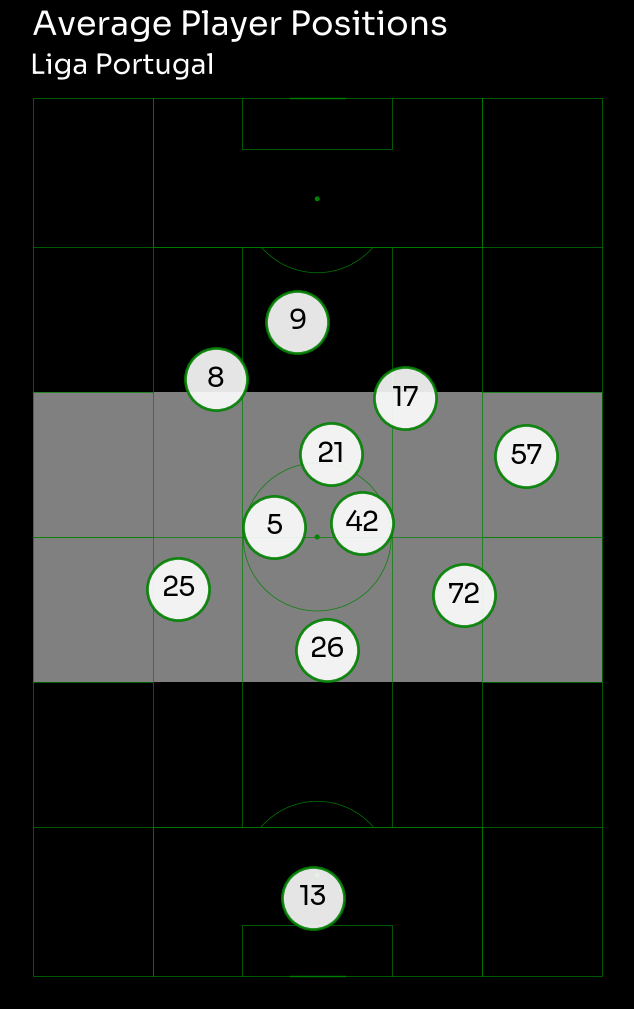

In [248]:
fig,ax=plt.subplots(figsize=(16,12), facecolor=background)
plot_avg_positions(df_avg_positions,'green',ax)

## Chance Creation Zones

In [98]:
df.columns

Index(['Unnamed: 0.1', 'index', 'eventId', 'minute', 'second', 'teamId', 'x',
       'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'relatedEventId', 'relatedPlayerId', 'isGoal_x', 'cardType_x',
       'isOwnGoal_x', 'cumulative_mins', 'Unnamed: 0_x', 'isGoal_y',
       'cardType_y', 'isOwnGoal_y', 'Unnamed: 0_y', 'x1_bin_xT', 'y1_bin_xT',
       'x2_bin_xT', 'y2_bin_xT', 'start_zone_value_xT', 'end_zone_value_xT',
       'xT', 'teamName', 'oppositionTeamName', 'Unnamed: 0', 'shirtNo', 'name',
       'position', 'isFirstEleven', 'prog_pass', 'prog_carry',
       'pass_or_carry_angle', 'shortName'],
      dtype='object')

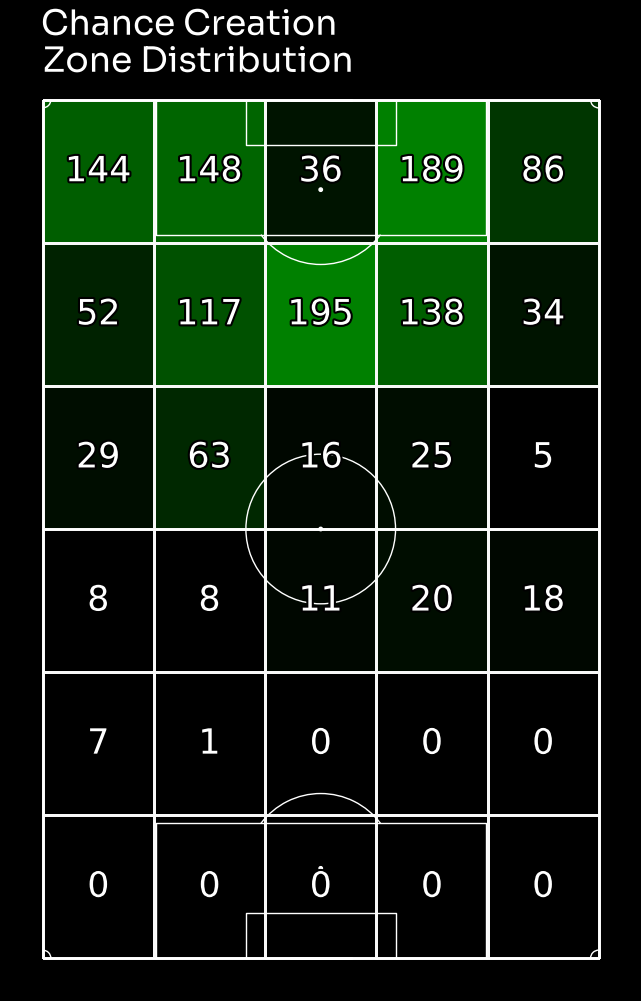

In [206]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
# setting the custom colormap
pearl_earring_cmaph = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors", [background, 'green'], N=20)

path_eff = [path_effects.Stroke(linewidth=3, foreground=background), path_effects.Normal()]

def Chance_creating_zone(ax, cm, col):
    ccp = df[df['qualifiers'].str.contains('KeyPass')]
    pitch = VerticalPitch(pitch_type='uefa', line_color='white', corner_arcs=True, line_zorder=2, pitch_color=background, linewidth=1)
    pitch.draw(ax=ax)
    #ax.set_xlim(-0.5, 105.5)

    cc = 0
    pearl_earring_cmap = cm
    bin_statistic = pitch.bin_statistic(ccp.x, ccp.y, bins=(6,5), statistic='count', normalize=False)
    pitch.heatmap(bin_statistic, ax=ax, cmap=pearl_earring_cmap, edgecolors='#f8f8f8')

    labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax, ha='center', va='center', str_format='{:.0f}', path_effects=path_eff)
    ax.text(30,116,f"Chance Creation  \n    Zone Distribution", color='white', fontsize=25, ha='right', va='top', fontweight='bold', path_effects=path_eff,fontproperties=font_prop)

fig,ax=plt.subplots(figsize=(16,12), facecolor=background)
chance_creating_stats_home = Chance_creating_zone(ax, pearl_earring_cmaph, 'green')

## Comparison Pizza Plots

Text(0.515, 0.942, 'Per 90 Data for Last 365 days')

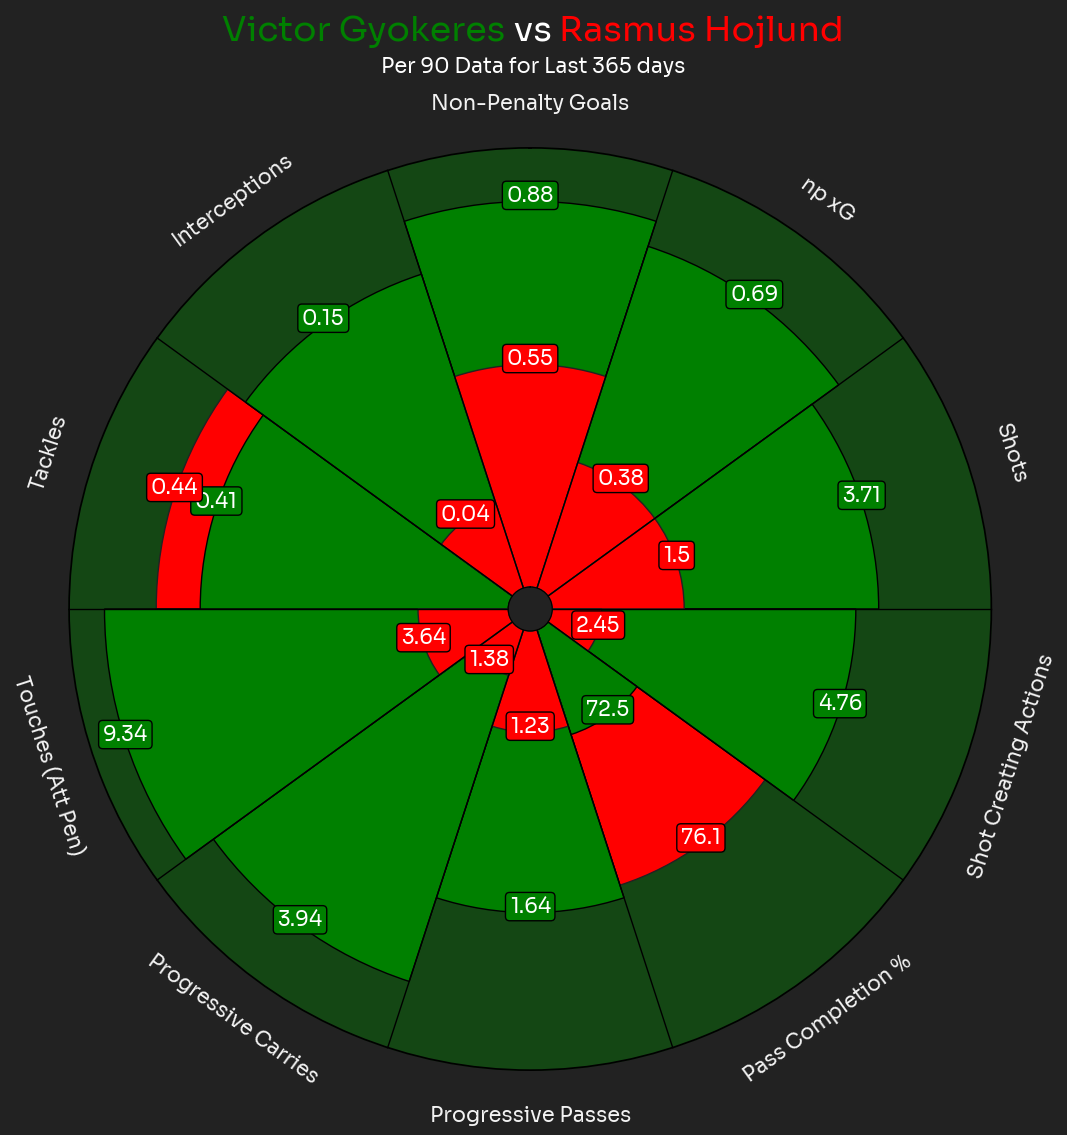

In [274]:
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager

params = [
    "Non-Penalty Goals", "np xG", "Shots", "Shot Creating Actions",
    "Pass Completion %", "Progressive Passes", "Progressive Carries", "Touches (Att Pen)",
    "Tackles", "Interceptions"
]

victor = [0.88, 0.69, 3.71, 4.76, 72.5, 1.64, 3.94, 9.34, 0.41, 0.15]
hojlund = [0.55, 0.38, 1.5, 2.45, 76.1, 1.23, 1.38, 3.64, 0.44, 0.04]
zirkzee =  [0.26, 0.32, 2.8, 3.06, 78.1, 2.95, 1.74, 4.65, 0.91, 0.08]

# minimum range value and maximum range value for parameters
min_range = [0.1, 0.2, 0, 2, 70, 1, 1, 2, 0.2, 0]
max_range = [0.99, 0.8, 5, 6, 80, 2, 4.5, 10, 0.5, 0.2]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    victor,                     # list of values
    compare_values=hojlund,    # passing comparison values
    figsize=(12, 12),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="green", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="red", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=15, zorder=5,
        fontproperties=font_prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="green",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="red",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

# add title
fig_text(
    0.515, 0.99, "<Victor Gyokeres> vs <Rasmus Hojlund>",
    size=25, fig=fig,
    highlight_textprops=[{"color": 'green'}, {"color": 'red'}],
    ha="center", fontproperties=font_prop, color="white"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Data for Last 365 days",
    size=15,
    ha="center", fontproperties=font_prop, color="white"
)

## PassMaps

Text(0.16, 0.15, 'Liga Portugal 2024/25')

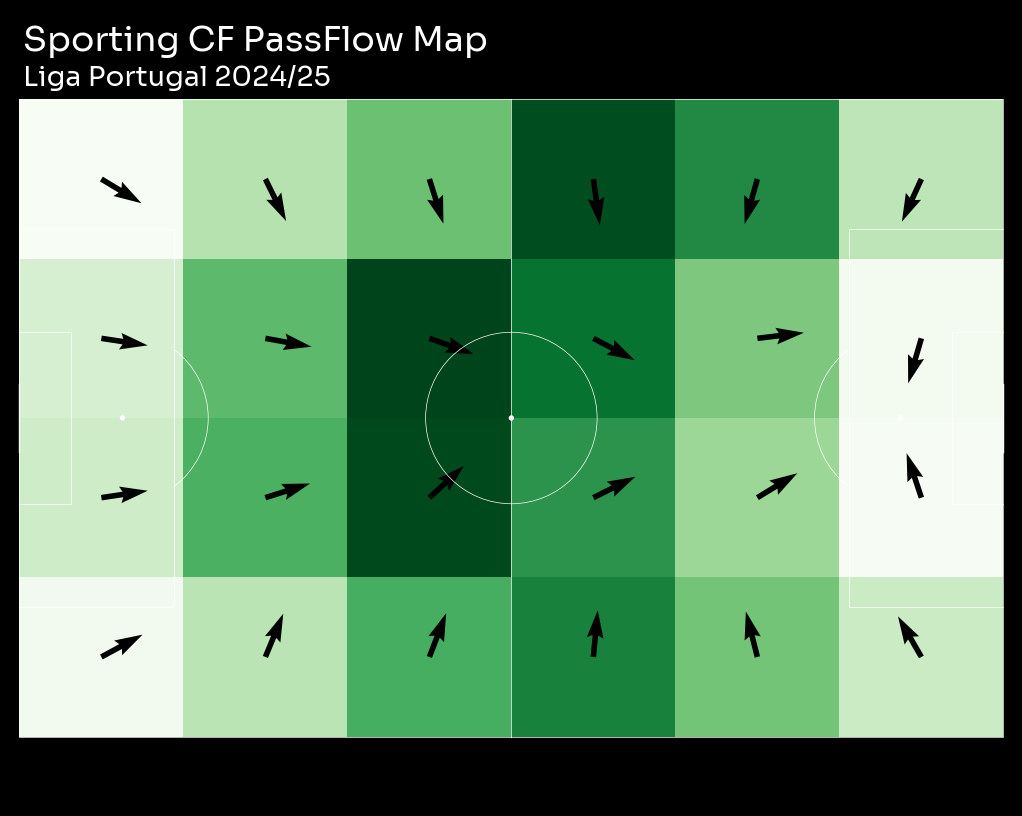

In [314]:
mask_passes = df.type == 'Pass'
passes_df = df.loc[mask_passes]
pitch = Pitch(pitch_type='uefa', pad_bottom=1, pad_top=1,pad_left=1, pad_right=1,
              line_zorder=2, line_color='white', pitch_color=background,linewidth=0.5)
bins = (6, 4)
fig, axs = pitch.grid(figheight=8,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor(background)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(passes_df.x, passes_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Greens')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(passes_df.x, passes_df.y, passes_df.endX, passes_df.endY,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

axs['title'].text(0.24, 0.6, f'Sporting CF PassFlow Map',
                  fontsize=25, fontproperties=font_prop,color='white', va='center', ha='center')
axs['title'].text(0.16, 0.15, f'Liga Portugal 2024/25',
                  fontsize=20, fontproperties=font_prop,color='white', va='center', ha='center')

## Defensive Actions

In [318]:
def get_defensive_action_df(df):
    # filter only defensive actions
    defensive_actions_ids = df.index[(df['type'] == 'Aerial') & (df['qualifiers'].str.contains('Defensive')) |
                                     (df['type'] == 'BallRecovery') |
                                     (df['type'] == 'BlockedPass') |
                                     (df['type'] == 'Challenge') |
                                     (df['type'] == 'Clearance') |
                                     (df['type'] == 'Error') |
                                     (df['type'] == 'Foul') |
                                     (df['type'] == 'Interception') |
                                     (df['type'] == 'Tackle')]
    df_defensive_actions = df.loc[defensive_actions_ids, ["index", "x", "y", "teamName", "playerId", "type", "outcomeType"]]

    return df_defensive_actions

defensive_actions_df = get_defensive_action_df(df)

In [323]:
defensive_actions_df = defensive_actions_df.drop_duplicates()

Text(49, 108, 'Liga Portugal')

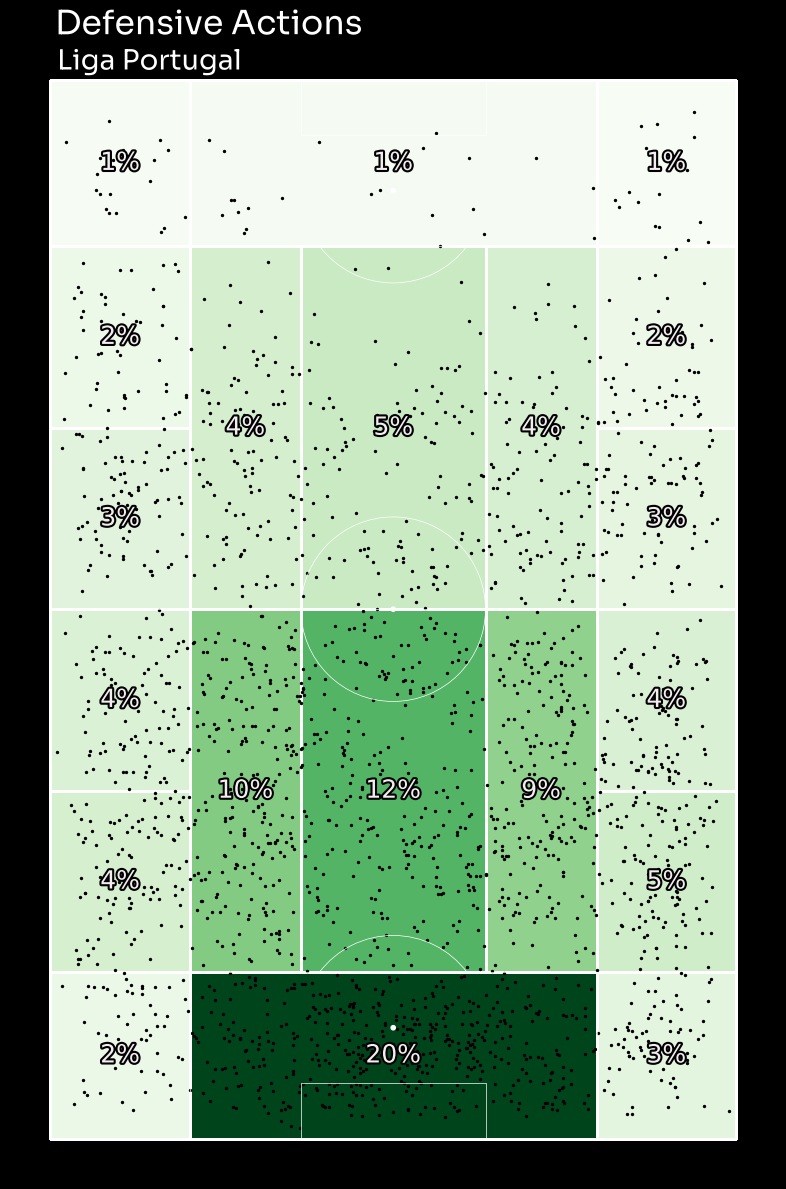

In [368]:
# setup pitch
pitch = VerticalPitch(pitch_type='uefa', line_zorder=2,
                      pitch_color=background, line_color='white',linewidth=0.5)
# draw
fig, ax = pitch.draw(figsize=(12, 12))
fig.set_facecolor(background)
bin_statistic = pitch.bin_statistic_positional(defensive_actions_df.x, defensive_actions_df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='Greens', edgecolors='white')
pitch.scatter(defensive_actions_df.x, defensive_actions_df.y, c='black', s=2, ax=ax)
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

ax.text(37,112,f" Defensive Actions", color='white', fontsize=24, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)
ax.text(49,108,f"Liga Portugal", color='white', fontsize=20, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)

## GK Analysis

## Set Piece Analysis

In [316]:
mask_corners = (
    (df['type'] == 'Pass') & 
    ((df['x'] == 99.5) & (df['y'] == 0.5) | (df['x'] == 0.5) & (df['y'] == 99.5))
)

# Filter the DataFrame to get corner kick events
corners = df.loc[mask_corners]

In [317]:
corners.shape

(0, 52)

## Waffle Charts